# Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, plot_confusion_matrix, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import train_test_split

# Dataset

In [2]:
df = pd.read_csv("../Models/data_tofit.csv")
df

,Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,SS,Amphet,Amyl,Benzos,Cannabis,Heroin,Ketamine,LSD,Meth,VSA,Addiction
0,0.49788,0.48246,-0.05921,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-1.18084,1,0,1,0,0,0,0,0,0,No Addiction
1,-0.07854,-0.48246,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.21575,1,1,0,1,0,1,1,1,0,Addiction without psychologic effect
2,0.49788,-0.48246,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,0.40148,0,0,0,1,0,0,0,0,0,No Addiction
3,-0.95197,0.48246,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.18084,0,0,1,1,0,1,0,0,0,No Addiction
4,0.49788,0.48246,1.98437,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21575,0,0,0,1,0,0,0,0,0,No Addiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-1.19430,1.74091,1.88511,0.76096,-1.13788,1.92173,0,0,0,1,0,0,1,0,1,Addiction without psychologic effect
1881,-0.95197,-0.48246,-0.61113,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.76540,0,0,0,1,0,0,1,1,0,Addiction without psychologic effect
1882,-0.07854,0.48246,0.45468,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,-0.52593,1,1,1,1,0,1,1,0,0,Addiction with psychologic effect
1883,-0.95197,0.48246,-0.61113,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.22470,0,0,0,1,0,0,1,0,0,Addiction with psychologic effect


# Model

In [3]:
# Split train test
X_train, X_test, y_train, y_test = train_test_split(df.drop("Addiction", axis = 1), df["Addiction"], test_size=0.35, random_state = 42,\
                                                   stratify = df["Addiction"])

In [4]:
param= {
    'loss': ['log'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [10 ** x for x in range(-6, 1)],
    'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1],
}

In [5]:
sgdc_grid = GridSearchCV(SGDClassifier(random_state = 42), param, cv= KFold(n_splits=5, random_state=42, shuffle = True),scoring = "accuracy")
sgdc_grid.fit(X_train, y_train)
sgdc_grid

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SGDClassifier(random_state=42),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95,
                                      1],
                         'loss': ['log'],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='accuracy')

In [6]:
print("Best parameters {} with best score {} ".format(sgdc_grid.best_params_,\
sgdc_grid.best_score_))

Best parameters {'alpha': 0.001, 'l1_ratio': 0.5, 'loss': 'log', 'penalty': 'elasticnet'} with best score 0.9404081632653062 


In [7]:
results = pd.DataFrame(sgdc_grid.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,param_loss,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012203,0.002401,0.0028,2.638778e-03,0.000001,0,log,l2,"{'alpha': 1e-06, 'l1_ratio': 0, 'loss': 'log',...",0.853061,0.926531,0.902041,0.902041,0.881633,0.893061,0.024544,125
1,0.017004,0.006421,0.0016,4.900573e-04,0.000001,0,log,l1,"{'alpha': 1e-06, 'l1_ratio': 0, 'loss': 'log',...",0.930612,0.906122,0.893878,0.889796,0.889796,0.902041,0.015489,100
2,0.017004,0.003407,0.0016,4.899404e-04,0.000001,0,log,elasticnet,"{'alpha': 1e-06, 'l1_ratio': 0, 'loss': 'log',...",0.853061,0.926531,0.902041,0.902041,0.881633,0.893061,0.024544,125
3,0.010602,0.001020,0.0010,2.336015e-07,0.000001,0.05,log,l2,"{'alpha': 1e-06, 'l1_ratio': 0.05, 'loss': 'lo...",0.853061,0.926531,0.902041,0.902041,0.881633,0.893061,0.024544,125
4,0.018204,0.005914,0.0016,4.898819e-04,0.000001,0.05,log,l1,"{'alpha': 1e-06, 'l1_ratio': 0.05, 'loss': 'lo...",0.930612,0.906122,0.893878,0.889796,0.889796,0.902041,0.015489,100


Text(0, 0.5, 'Mean')

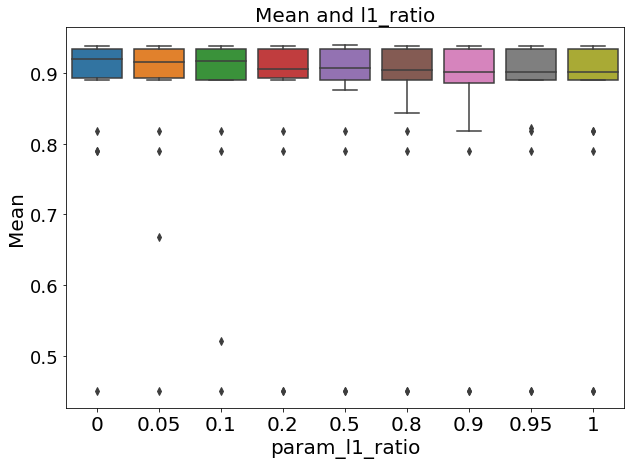

In [8]:
# Boxplot scores by loss

plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['font.size'] = 26
plt.figure(figsize=(10, 7))

plt.title('Mean and l1_ratio', fontsize=20)

sns.boxplot(x = "param_l1_ratio", y ='mean_test_score', data = results)

plt.ylabel('Mean')

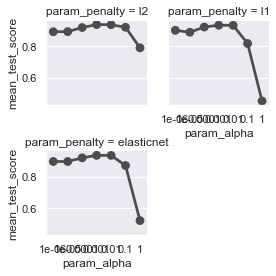

In [9]:
#Comparing scores by alpha and gamma penalty
sns.set()
g = sns.FacetGrid(results, col="param_penalty", col_wrap=2, height=2)
g.map(sns.pointplot, "param_alpha", "mean_test_score", order=[10 ** x for x in range(-6, 1)], color=".3", ci=None)

- l1 ratio don't have impact on the algorithm
- alpha is the most important parameter to tune
- great results on this train, hard to improve with bigger alpha (observation of a maximum for alpha at 0.001)

## Test Model

In [10]:
# Testing model
y_pred = sgdc_grid.predict(X_test)
accuracy_score(y_test, y_pred)

0.9363636363636364

In [11]:
cross = pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predicted'], margins=True)
cross

Predicted,Addiction with psychologic effect,Addiction without psychologic effect,No Addiction,All
Real,,,,
Addiction with psychologic effect,178,2,3,183
Addiction without psychologic effect,13,158,8,179
No Addiction,9,7,282,298
All,200,167,293,660


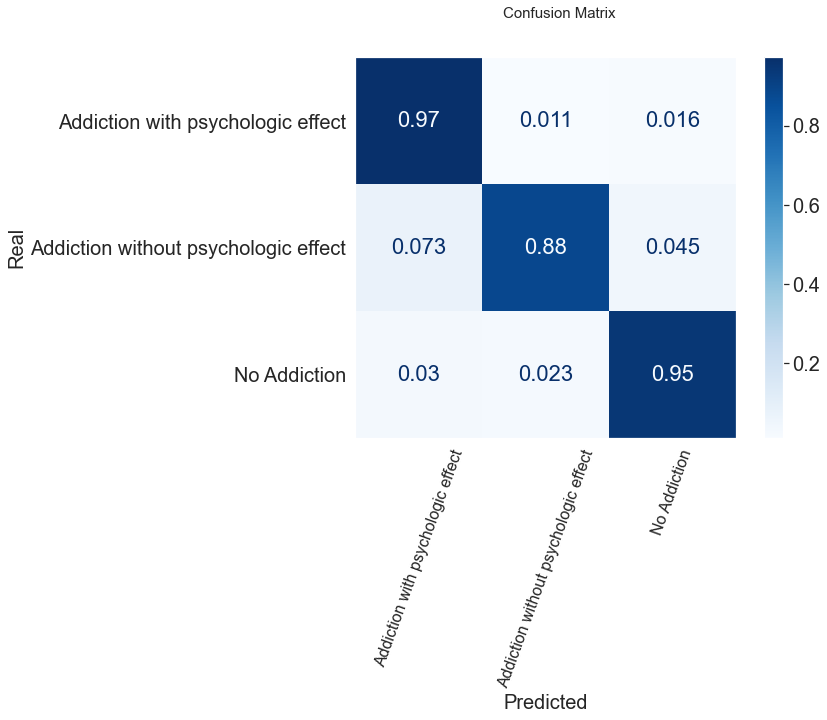

In [12]:
# Confusion Matrix

plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(1, 1, figsize=(10,7))
plt.grid(False)
fig.suptitle('Confusion Matrix', fontsize=15)
plot_confusion_matrix(sgdc_grid, X_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.xlabel('Predicted')
plt.xticks(rotation =70)
plt.ylabel('Real')
plt.show() 